# importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
df = pd.read_excel('archive/Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Statistical analysis

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Univarate Analysis

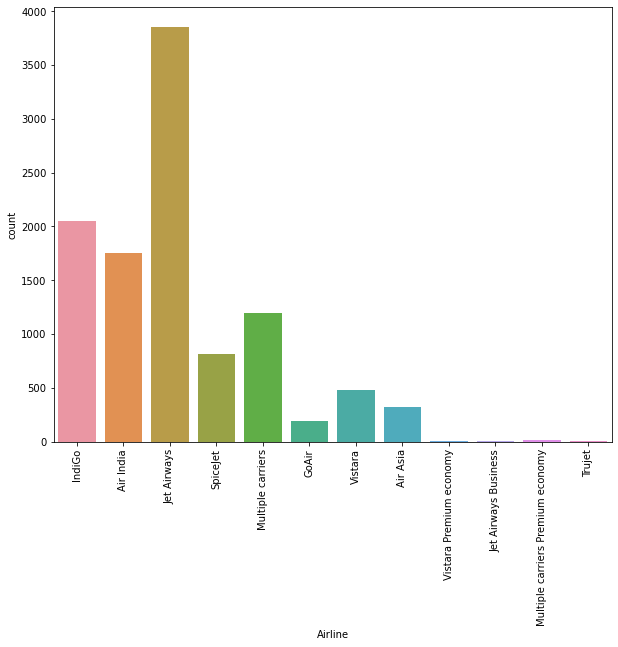

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(df.Airline)
plt.xticks(rotation=90)
plt.show()

In [24]:
for i in df.Airline.unique():
    print(i,':',len(df[df.Airline==i]))

IndiGo : 2053
Air India : 1752
Jet Airways : 3849
SpiceJet : 818
Multiple carriers : 1196
GoAir : 194
Vistara : 479
Air Asia : 319
Vistara Premium economy : 3
Jet Airways Business : 6
Multiple carriers Premium economy : 13
Trujet : 1


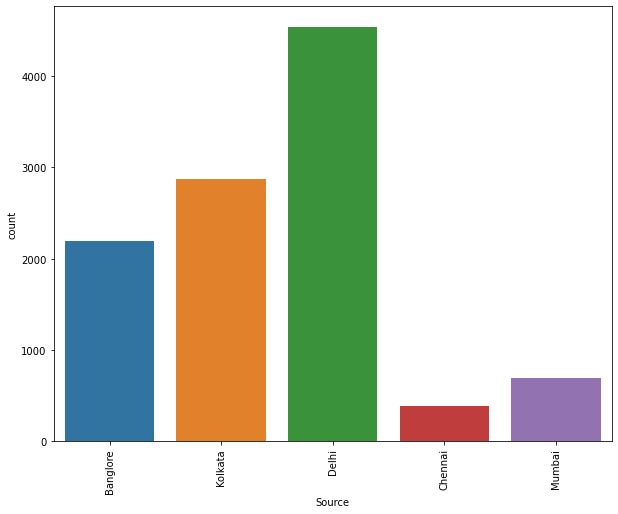

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(df.Source)
plt.xticks(rotation=90)
plt.show()

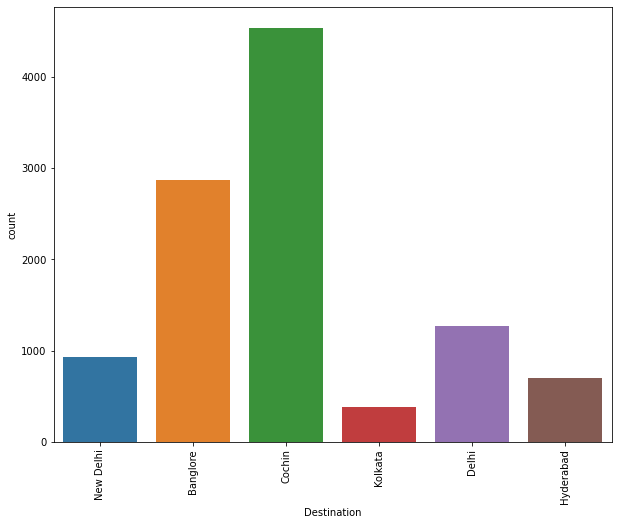

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df.Destination)
plt.xticks(rotation=90)
plt.show()

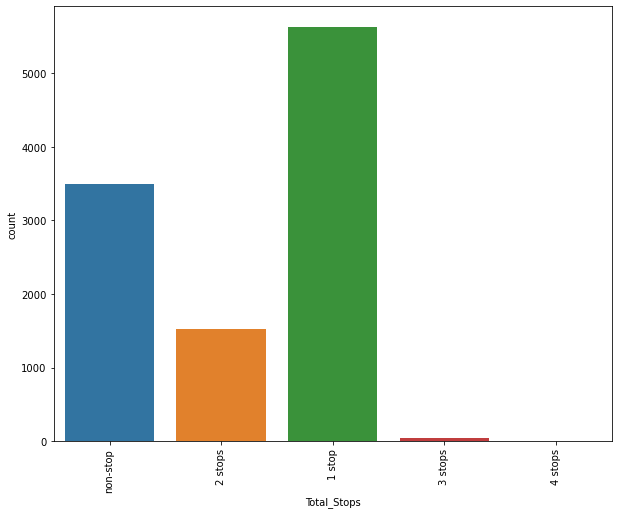

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(df.Total_Stops)
plt.xticks(rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


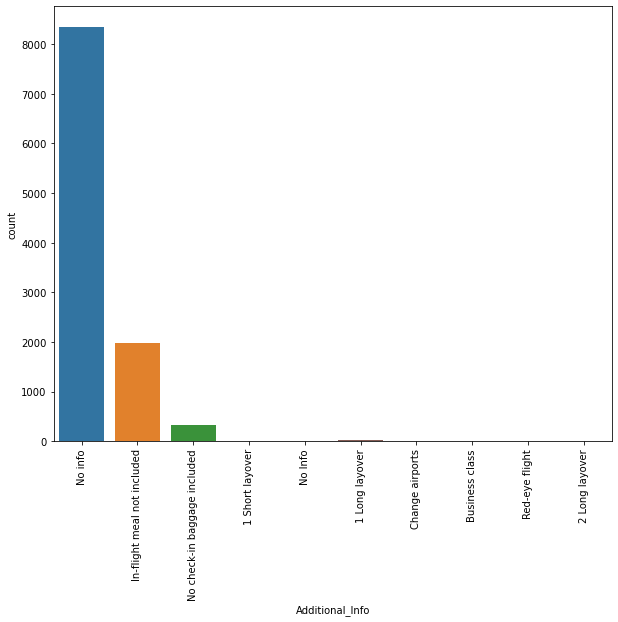

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(df.Additional_Info)
plt.xticks(rotation=90)
plt.show()

In [50]:
# Total routes: 128
df.groupby('Route').size().sort_values(ascending=0)

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXZ → MAA → BLR       1
BOM → JAI → DEL → HYD       1
BOM → BBI → HYD             1
CCU → RPR → HYD → BLR       1
BLR → BOM → IXC → DEL       1
Length: 128, dtype: int64

In [47]:
# Top 10 routes
top10_routes = df.groupby('Route').size().sort_values(ascending=0)[:10]
top10_routes

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
dtype: int64

# Bi Variate Analysis

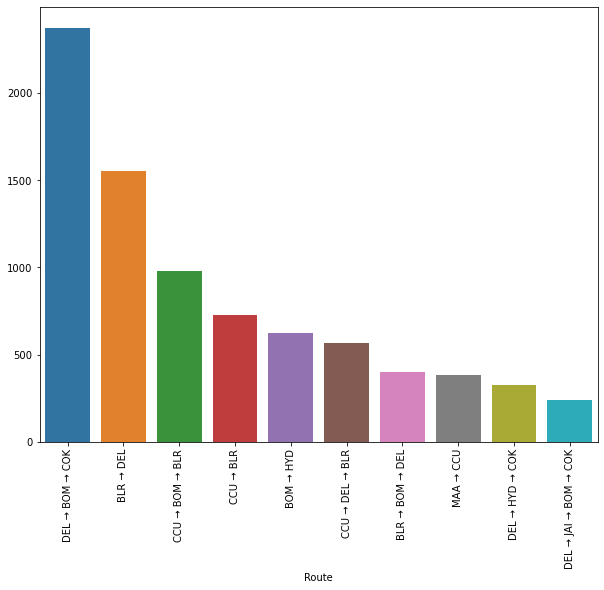

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(top10_routes.index,top10_routes)
plt.xticks(rotation=90)
plt.show()

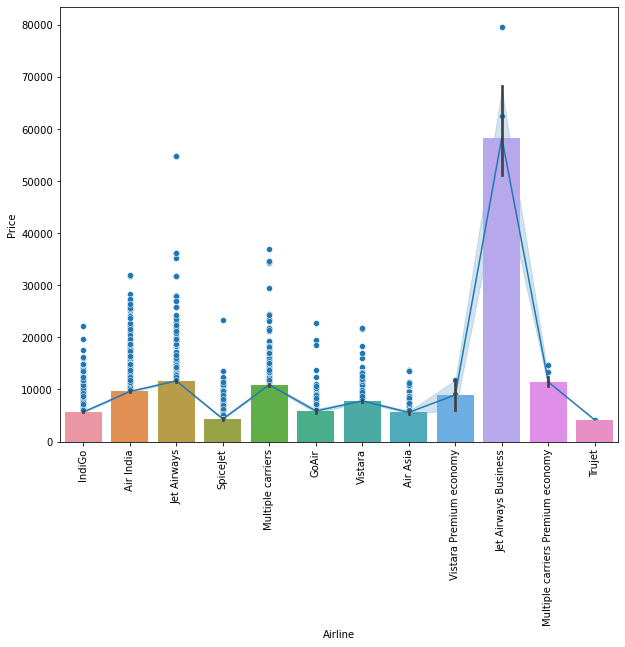

In [17]:
plt.figure(figsize=(10,8))
sns.lineplot(df['Airline'],df['Price'])
sns.scatterplot(df['Airline'],df['Price'])
sns.barplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)
plt.show()

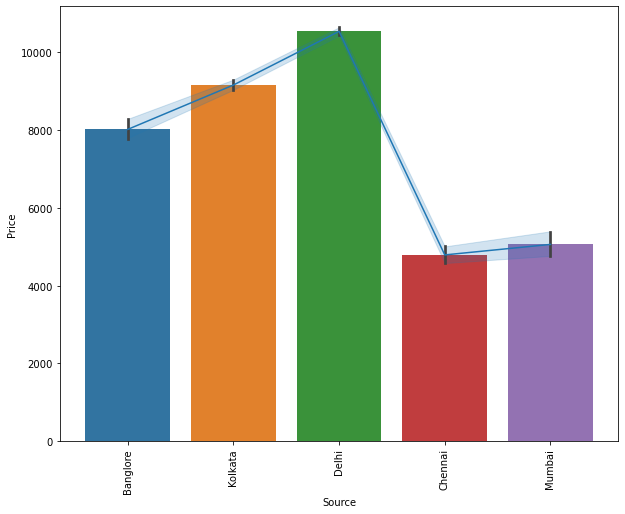

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(df['Source'],df['Price'])
sns.lineplot(df['Source'],df['Price'])
plt.xticks(rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


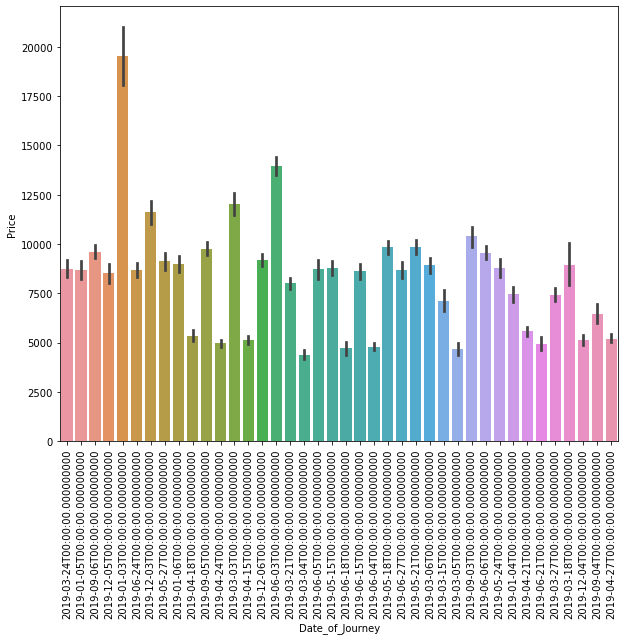

In [79]:
ob = pd.to_datetime(df['Date_of_Journey'])
#pd.DatetimeIndex(ob).month

plt.figure(figsize=(10,8))
sns.barplot(ob,df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'